In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/banknifty_5min_10000days_data.csv')

In [7]:
df

,date,open,high,low,close,volume
0,2017-07-17 09:10:00,24011.40,24011.40,24011.40,24011.40,0
1,2017-07-17 09:15:00,24011.40,24014.40,23963.20,23992.10,0
2,2017-07-17 09:20:00,23991.70,23994.20,23954.10,23984.00,0
3,2017-07-17 09:25:00,23984.60,23995.20,23967.90,23975.30,0
4,2017-07-17 09:30:00,23974.90,23984.80,23941.60,23943.70,0
...,...,...,...,...,...,...
137628,2024-12-19 15:05:00,51598.35,51626.95,51572.60,51580.75,0
137629,2024-12-19 15:10:00,51584.70,51584.70,51556.90,51578.60,0
137630,2024-12-19 15:15:00,51575.90,51613.60,51549.65,51552.70,0
137631,2024-12-19 15:20:00,51552.70,51586.75,51550.75,51583.75,0


In [8]:
df.drop('volume',axis=1,inplace=True)

In [9]:
df['datetime'] = pd.to_datetime(df['date'])

In [10]:
df['date'] = df['datetime'].dt.date

In [11]:
df.drop('datetime',axis=1,inplace=True)

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.set_index('date',inplace=True)

In [14]:
df

,open,high,low,close
date,,,,
2017-07-17,24011.40,24011.40,24011.40,24011.40
2017-07-17,24011.40,24014.40,23963.20,23992.10
2017-07-17,23991.70,23994.20,23954.10,23984.00
2017-07-17,23984.60,23995.20,23967.90,23975.30
2017-07-17,23974.90,23984.80,23941.60,23943.70
...,...,...,...,...
2024-12-19,51598.35,51626.95,51572.60,51580.75
2024-12-19,51584.70,51584.70,51556.90,51578.60
2024-12-19,51575.90,51613.60,51549.65,51552.70


In [15]:
#df_std = (df - df.mean())/df.std()

In [16]:
df_new = df[['close']].copy()

In [17]:
df_new

,close
date,
2017-07-17,24011.40
2017-07-17,23992.10
2017-07-17,23984.00
2017-07-17,23975.30
2017-07-17,23943.70
...,...
2024-12-19,51580.75
2024-12-19,51578.60
2024-12-19,51552.70


In [18]:
df_new['close_1'] = df_new['close'].shift(1)
df_new['close_2'] = df_new['close'].shift(2)
df_new['close_3'] = df_new['close'].shift(3)
df_new['close_4'] = df_new['close'].shift(4)
df_new['close_5'] = df_new['close'].shift(5)

In [19]:
df_new.head(10)

,close,close_1,close_2,close_3,close_4,close_5
date,,,,,,
2017-07-17,24011.4,NaN,NaN,NaN,NaN,NaN
2017-07-17,23992.1,24011.4,NaN,NaN,NaN,NaN
2017-07-17,23984.0,23992.1,24011.4,NaN,NaN,NaN
2017-07-17,23975.3,23984.0,23992.1,24011.4,NaN,NaN
2017-07-17,23943.7,23975.3,23984.0,23992.1,24011.4,NaN
2017-07-17,23936.8,23943.7,23975.3,23984.0,23992.1,24011.4
2017-07-17,23920.9,23936.8,23943.7,23975.3,23984.0,23992.1
2017-07-17,23962.8,23920.9,23936.8,23943.7,23975.3,23984.0
2017-07-17,23983.1,23962.8,23920.9,23936.8,23943.7,23975.3


In [20]:
df_new.dropna(inplace=True)

In [21]:
df_new

,close,close_1,close_2,close_3,close_4,close_5
date,,,,,,
2017-07-17,23936.80,23943.70,23975.30,23984.00,23992.10,24011.40
2017-07-17,23920.90,23936.80,23943.70,23975.30,23984.00,23992.10
2017-07-17,23962.80,23920.90,23936.80,23943.70,23975.30,23984.00
2017-07-17,23983.10,23962.80,23920.90,23936.80,23943.70,23975.30
2017-07-17,23978.70,23983.10,23962.80,23920.90,23936.80,23943.70
...,...,...,...,...,...,...
2024-12-19,51580.75,51600.15,51515.90,51522.50,51495.40,51506.40
2024-12-19,51578.60,51580.75,51600.15,51515.90,51522.50,51495.40
2024-12-19,51552.70,51578.60,51580.75,51600.15,51515.90,51522.50


In [22]:
x = df_new.drop('close',axis=1)
y = df_new['close']

In [23]:
x,y

(             close_1   close_2   close_3   close_4   close_5
 date                                                        
 2017-07-17  23943.70  23975.30  23984.00  23992.10  24011.40
 2017-07-17  23936.80  23943.70  23975.30  23984.00  23992.10
 2017-07-17  23920.90  23936.80  23943.70  23975.30  23984.00
 2017-07-17  23962.80  23920.90  23936.80  23943.70  23975.30
 2017-07-17  23983.10  23962.80  23920.90  23936.80  23943.70
 ...              ...       ...       ...       ...       ...
 2024-12-19  51600.15  51515.90  51522.50  51495.40  51506.40
 2024-12-19  51580.75  51600.15  51515.90  51522.50  51495.40
 2024-12-19  51578.60  51580.75  51600.15  51515.90  51522.50
 2024-12-19  51552.70  51578.60  51580.75  51600.15  51515.90
 2024-12-19  51583.75  51552.70  51578.60  51580.75  51600.15
 
 [137628 rows x 5 columns],
 date
 2017-07-17    23936.80
 2017-07-17    23920.90
 2017-07-17    23962.80
 2017-07-17    23983.10
 2017-07-17    23978.70
                 ...   
 2024-12-19   

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((110102, 5), (27526, 5), (110102,), (27526,))

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [31]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(n_estimators=80,max_depth=7,random_state=25)
model = lgb.fit(x_train,y_train)

#when data is large then it is faster tab gradient boost.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 110102, number of used features: 5
[LightGBM] [Info] Start training from score 34493.515874


In [32]:
y_pred_lgb = model.predict(x_test)

In [33]:
mse = mean_squared_error(y_test,y_pred_lgb)
mae = mean_absolute_error(y_test,y_pred_lgb)
mape = mean_absolute_percentage_error(y_test,y_pred_lgb)
mse,mae,mape

(5433.971445944408, 45.26000283614525, 0.0014154635514273804)

In [34]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)    #i just check the model is over fit or not.

train_mae = mean_absolute_error(y_train,train_pred)
test_mae = mean_absolute_error(y_test,test_pred)
train_mae,test_mae

# here train_mae(44.3) and test_mae(45.2) not big difference, so model is not over fit

(44.302458731126336, 45.26000283614525)

Text(0.5, 1.0, 'Actual vs Predicted (LightGBM)')

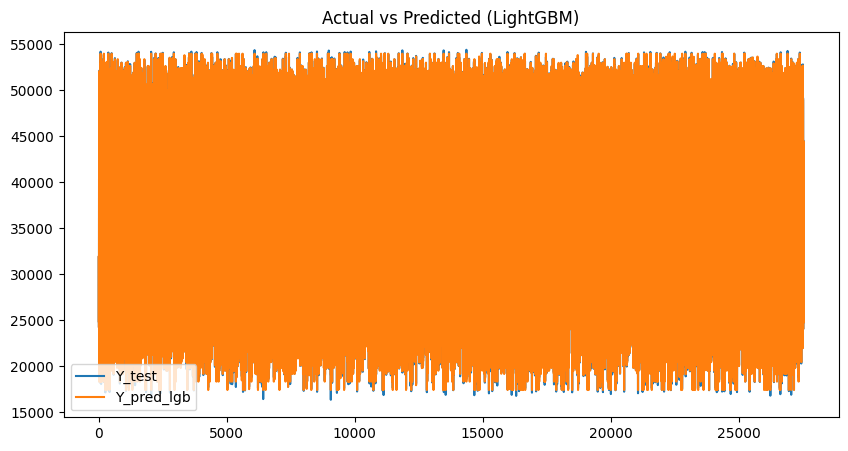

In [35]:
import matplotlib.pyplot as plt
res = pd.DataFrame([y_test.values, y_pred_lgb]).T
res.columns = ['Y_test', 'Y_pred_lgb']
res.plot(figsize=(10, 5)) # plot with width and height in inches
plt.title('Actual vs Predicted (LightGBM)')

**Deployment**

In [ ]:
with open('LGBM.pkl','wb') as file:
  import pickle
  pickle.dump(model,file)